<a href="https://colab.research.google.com/github/sunshineluyao/vis-basics/blob/main/chapter5/Chapter_5_Marks_and_Channels_R_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R offers a rich ecosystem of libraries tailored for data visualization, enabling users to create a wide array of static and interactive graphics. Below is an overview of some prominent R packages for data visualization:

### 1. **ggplot2**: Lollipop Plot
#### Introduction
**Library**: `ggplot2` is a widely used data visualization package in R, known for its elegant and flexible grammar of graphics. It allows the creation of a variety of plots and is highly customizable, making it a favorite among data scientists and statisticians.

**Plot**: A **Lollipop Plot** is a variation of a bar chart, where vertical lines and dots are used to represent values. It is particularly effective for comparing a small number of categories.

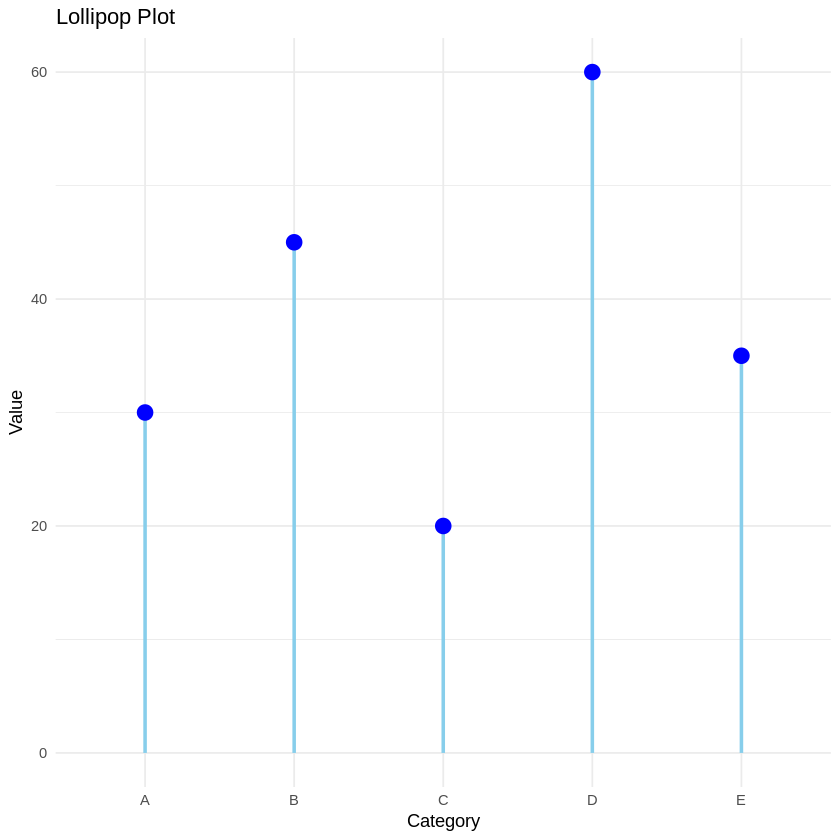

In [2]:
# Load necessary libraries
library(ggplot2)

# Simulated data
data <- data.frame(
  category = c("A", "B", "C", "D", "E"),
  value = c(30, 45, 20, 60, 35)
)

# Creating a Lollipop Plot with updated `linewidth` aesthetic
ggplot(data, aes(x = category, y = value)) +
  geom_segment(aes(x = category, xend = category, y = 0, yend = value), color = "skyblue", linewidth = 1) +
  geom_point(color = "blue", size = 4) +
  labs(title = "Lollipop Plot", x = "Category", y = "Value") +
  theme_minimal()


#### Rationale
- **Marks**: The vertical lines (segments) and dots (points) are the primary marks in this plot. The lines emphasize the magnitude of each value, while the dots draw attention to the endpoints, making it easy to compare values.
- **Channels**:
  - **Position**: The categories are positioned along the X-axis, while the values are represented along the Y-axis.
  - **Color**: A consistent color scheme is used to maintain simplicity and focus on the data comparison.

---

In [40]:
# Simulated regression results data
set.seed(123)  # For reproducibility

data <- data.frame(
  Sector = c("Agriculture", "Basic metals", "Chemicals/Pharmaceuticals", "Construction",
             "Education", "Electrical machinery", "Electricity", "Fabricated metals",
             "Finance and insurance", "Food products", "Health", "Hotels and restaurants",
             "ICT and electronics", "Machinery", "Mining", "Motor vehicles",
             "Non-metal Minerals", "Other manufacturing", "Other transport",
             "Paper and printing", "Professional, scientific and technical",
             "Public admin", "Real estate", "Recreation", "Renting of machinery",
             "Rubber and plastics", "Telecoms", "Textiles and apparel",
             "Transportation", "Wholesale and retail", "Wood"),
  Loss_Before_2023 = runif(31, 10, 100),  # Random values between 10 and 100
  Loss_After_2023 = runif(31, 20, 150)    # Random values between 20 and 150
)



#### Explanation of the Code
1. **Simulated Data**: The dataset `data` contains random values for losses before and after 2023 for different sectors.
2. **Pivot Data**: We use `pivot_longer()` from the `tidyr` package to reshape the data from wide format to long format, making it suitable for `ggplot2`.
3. **Lollipop Plot**:
   - **`geom_segment()`**: Draws lines connecting the points representing losses before and after 2023 for each sector.
   - **`geom_point()`**: Plots the actual points for losses before and after 2023.
   - **`scale_color_manual()`**: Defines custom colors for the two loss types, making the plot easier to interpret.
4. **Theme**: `theme_minimal()` is used to give the plot a clean and modern appearance, and the legend is positioned on the right.

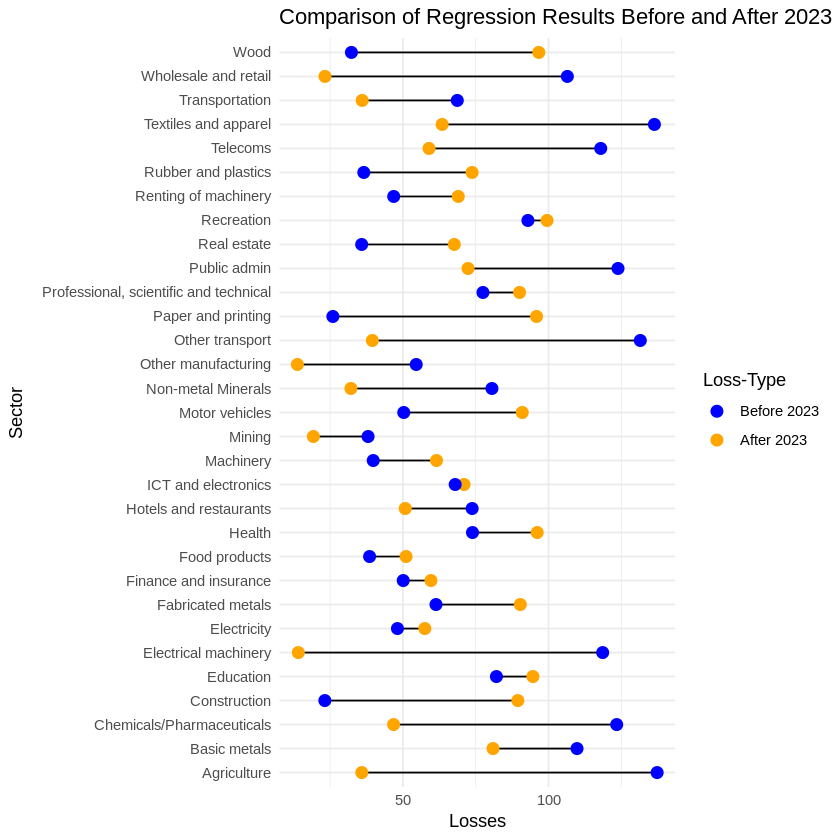

In [41]:
# Load ggplot2 for plotting
library(ggplot2)

# Reshape the data for ggplot2
library(tidyr)
data_long <- pivot_longer(data, cols = c("Loss_Before_2023", "Loss_After_2023"),
                          names_to = "Loss_Type", values_to = "Losses")

# Creating the Lollipop Plot
ggplot(data_long, aes(x = Losses, y = Sector, color = Loss_Type)) +
  geom_segment(aes(x = Loss_Before_2023, xend = Loss_After_2023, y = Sector, yend = Sector),
               data = data, color = "black", size = 0.5) +
  geom_point(size = 3) +
  scale_color_manual(values = c("Loss_Before_2023" = "orange", "Loss_After_2023" = "blue"),
                     labels = c("Before 2023", "After 2023")) +
  labs(title = "Comparison of Regression Results Before and After 2023",
       x = "Losses", y = "Sector", color = "Loss-Type") +
  theme_minimal() +
  theme(legend.position = "right")


#### Rationale for Marks and Channels
- **Marks**: The plot uses segments (lines) to connect the losses before and after 2023 for each sector, emphasizing the change. Points are used to mark the exact values, making it easy to see the magnitude of losses.
- **Channels**:
  - **Position**: The X-axis represents the magnitude of losses, while the Y-axis lists the sectors. This arrangement clearly shows the relative sizes of losses across sectors.
  - **Color**: Different colors are used to distinguish between losses before and after 2023, making the comparison intuitive.

#### Storytelling Advantage
- **Clear Comparison**: The Lollipop Plot makes it easy to compare regression results before and after 2023, highlighting sectors with the most significant changes.
- **Engaging Visual**: The use of color and connecting lines makes the plot engaging and informative, ideal for presenting to stakeholders or in reports.

This setup will produce a plot similar to the one in your screenshot, showing how regression results differ across sectors before and after 2023.

### 2. **fmsb**: Radar Chart
#### Introduction
**Library**: `fmsb` is an R package that specializes in creating radar charts, also known as spider plots. Radar charts are useful for displaying multivariate data in a circular layout, often used in performance analysis or comparing multiple variables simultaneously.

**Plot**: A **Radar Chart** shows the values of multiple variables for different entities, making it easy to see which variables are higher or lower for each entity.

In [11]:
install.packages("fmsb")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



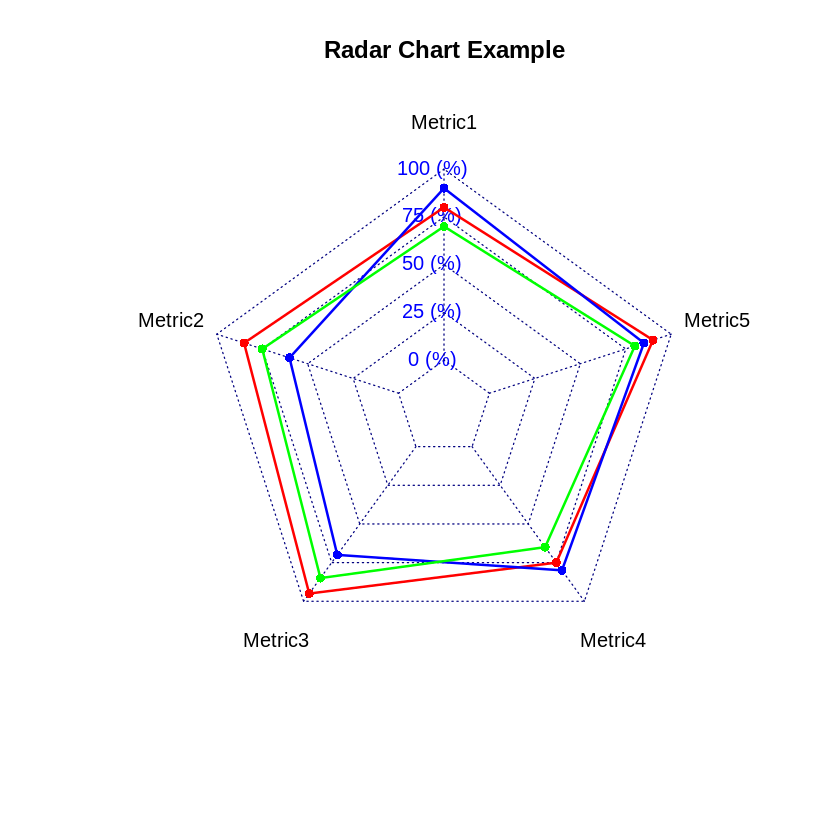

In [12]:
# Load necessary library
library(fmsb)

# Simulated data
data <- data.frame(
  Metric1 = c(80, 90, 70),
  Metric2 = c(85, 60, 75),
  Metric3 = c(95, 70, 85),
  Metric4 = c(75, 80, 65),
  Metric5 = c(90, 85, 80)
)
# Adding max and min rows for radar chart formatting
data <- rbind(max = c(100, 100, 100, 100, 100), min = c(0, 0, 0, 0, 0), data)

# Creating a Radar Chart
radarchart(data, axistype = 1, pcol = c("red", "blue", "green"), plwd = 2, plty = 1,
           title = "Radar Chart Example")

In [22]:
install.packages("circlize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘GlobalOptions’, ‘shape’




In [42]:
# Simulated performance data for different LLMs
data <- data.frame(
  Operating_System = c(100, 0, 80, 75, 90, 85, 60, 70, 95, 65),
  Database = c(100, 0, 70, 60, 80, 65, 50, 55, 85, 45),
  Knowledge_Graph = c(100, 0, 85, 80, 95, 90, 65, 75, 85, 55),
  Digital_Card_Game = c(100, 0, 60, 55, 70, 65, 40, 45, 75, 50),
  Lateral_Thinking_Puzzle = c(100, 0, 75, 70, 85, 80, 55, 60, 90, 65),
  House_holding = c(100, 0, 65, 60, 75, 70, 50, 55, 80, 45),
  Web_Shopping = c(100, 0, 90, 85, 95, 80, 70, 75, 85, 60),
  Web_Browsing = c(100, 0, 85, 80, 90, 85, 65, 70, 95, 50)
)

# Adding row names for models
row.names(data) <- c("Max", "Min", "gpt-4", "gpt-3.5-turbo", "claude-2",
                     "chat-bison-001", "llama-2-13b", "llama-2-70b",
                     "codellama-34b-instruct", "dolly-12b")


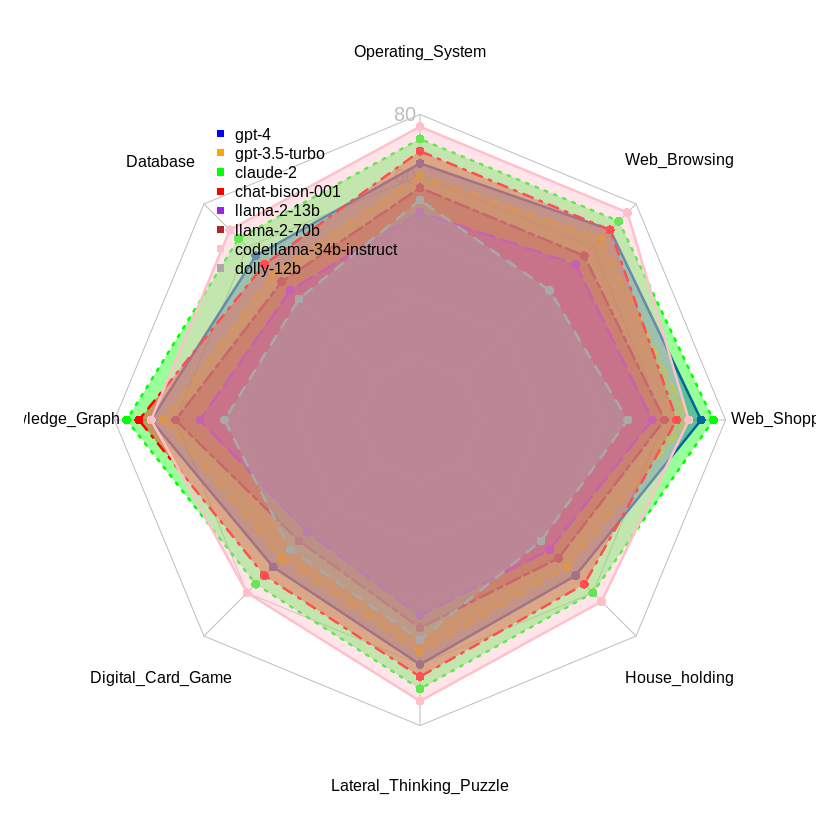

In [45]:
# Load the necessary package
library(fmsb)

# Simulated performance data for different LLMs
data <- data.frame(
  Operating_System = c(100, 0, 80, 75, 90, 85, 60, 70, 95, 65),
  Database = c(100, 0, 70, 60, 80, 65, 50, 55, 85, 45),
  Knowledge_Graph = c(100, 0, 85, 80, 95, 90, 65, 75, 85, 55),
  Digital_Card_Game = c(100, 0, 60, 55, 70, 65, 40, 45, 75, 50),
  Lateral_Thinking_Puzzle = c(100, 0, 75, 70, 85, 80, 55, 60, 90, 65),
  House_holding = c(100, 0, 65, 60, 75, 70, 50, 55, 80, 45),
  Web_Shopping = c(100, 0, 90, 85, 95, 80, 70, 75, 85, 60),
  Web_Browsing = c(100, 0, 85, 80, 90, 85, 65, 70, 95, 50)
)

# Adding row names for models
row.names(data) <- c("Max", "Min", "gpt-4", "gpt-3.5-turbo", "claude-2",
                     "chat-bison-001", "llama-2-13b", "llama-2-70b",
                     "codellama-34b-instruct", "dolly-12b")

# Adjust colors with transparency using adjustcolor()
colors <- c("blue", "orange", "green", "red", "purple", "brown", "pink", "darkgray", "gold")
transparent_colors <- sapply(colors, function(col) adjustcolor(col, alpha.f = 0.4))

# Plot the radar chart with transparent colors
par(mar = c(1, 1, 1, 1))  # Adjust margins for better fit
radarchart(
  data,
  axistype = 1,
  pcol = colors,  # Line colors
  pfcol = transparent_colors,  # Transparent fill colors
  plwd = 2,
  cglcol = "grey", cglty = 1, axislabcol = "grey", caxislabels = seq(0, 100, 20), cglwd = 0.8,
  vlcex = 0.8
)

# Adding a legend with a custom position
legend(
  x = -0.7, y = 1,  # Adjust the x and y coordinates to move the legend to the left
  legend = c("gpt-4", "gpt-3.5-turbo", "claude-2", "chat-bison-001",
             "llama-2-13b", "llama-2-70b", "codellama-34b-instruct", "dolly-12b"),
  col = colors, pch = 15, bty = "n", cex = 0.8
)


#### Rationale for Marks and Channels
- **Marks**: Polygons represent each LLM's performance across multiple user cases. The lines and fill colors help distinguish between different models.
- **Channels**:
  - **Position**: Each axis represents a different user case, radiating out from the center, allowing easy comparison across all dimensions.
  - **Color**: Different colors for each model make it easy to identify and compare performance visually.
  - **Size and Shape**: The size of each polygon gives a sense of the overall performance of the model, while the shape indicates strengths and weaknesses across different user cases.

#### Storytelling Advantage
- **Comprehensive Comparison**: The radar chart provides a clear, concise way to compare multiple models across various user cases, highlighting where each model excels or lags.
- **Visual Appeal**: The use of colors and filled polygons makes the chart engaging and easy to interpret, especially for audiences who may not be familiar with the underlying data.

This code will generate a radar chart similar to the one shown in your screenshot, allowing you to visualize the performance of different language models across user cases effectively.

### 3. **circlize**: Chord Diagram
#### Introduction
**Library**: `circlize` is a powerful R package for creating circular visualizations, such as chord diagrams. These diagrams are effective for showing relationships and flows between different groups.

**Plot**: A **Chord Diagram** visualizes the connections between groups in a circular layout.

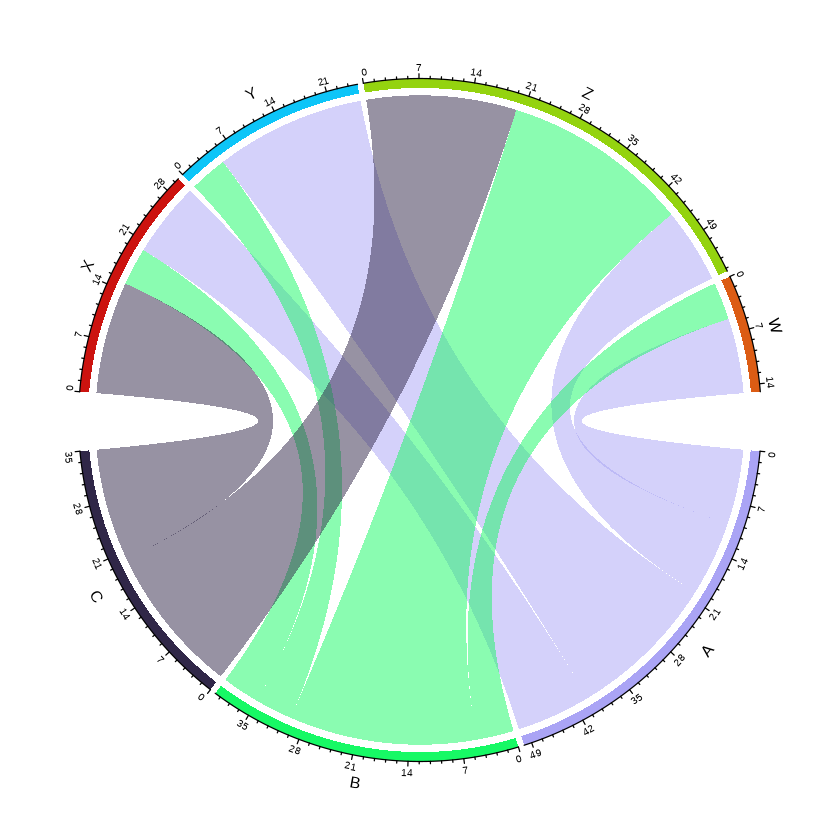

In [24]:
# Load necessary library
library(circlize)

# Simulated data (corrected matrix dimensions)
data <- matrix(
  c(10, 5, 15, 20, 5, 0, 10, 25, 20, 10, 5, 0),
  nrow = 3,
  dimnames = list(c("A", "B", "C"), c("X", "Y", "Z", "W"))
)

# Creating a chord diagram
chordDiagram(data, transparency = 0.5)


#### Rationale
- **Marks**: Curved lines (chords) connect groups around the circle, representing relationships or flows.
- **Channels**:
  - **Position**: Groups are positioned around the circle, and chords connect related groups.
  - **Color**: Chords and segments use color to differentiate between groups and make relationships clear.

---

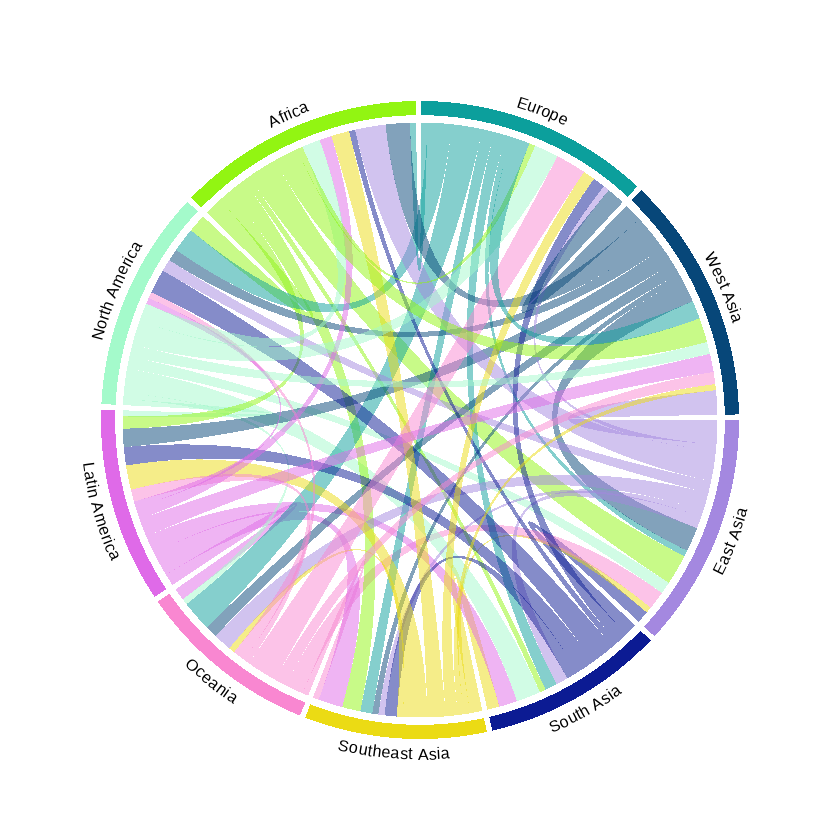

In [48]:
# Load the circlize package
library(circlize)

# Simulated flow data between regions
regions <- c("East Asia", "South Asia", "Southeast Asia", "Oceania",
             "Latin America", "North America", "Africa", "Europe", "West Asia")

# Create a matrix to represent flows between regions
flow_matrix <- matrix(
  c(0, 2, 1, 3, 0, 2, 5, 1, 4,
    2, 0, 2, 0, 3, 4, 1, 2, 0,
    1, 2, 0, 1, 4, 0, 3, 2, 1,
    3, 0, 1, 0, 2, 1, 0, 5, 2,
    0, 3, 4, 2, 0, 1, 2, 0, 3,
    2, 4, 0, 1, 1, 0, 3, 4, 2,
    5, 1, 3, 0, 2, 3, 0, 1, 4,
    1, 2, 2, 5, 0, 4, 1, 0, 3,
    4, 0, 1, 2, 3, 2, 4, 3, 0),
  nrow = 9, byrow = TRUE,
  dimnames = list(regions, regions)
)

# Create the Chord Diagram
chordDiagram(
  flow_matrix,
  transparency = 0.5,  # Make connections semi-transparent
  annotationTrack = "grid",  # Add a grid to label regions
  preAllocateTracks = list(track.height = 0.1)
)

# Adjust the placement of the region labels
circos.trackPlotRegion(
  track.index = 1,
  panel.fun = function(x, y) {
    circos.text(
      CELL_META$xcenter, CELL_META$ylim[1] + 0.2,  # Adjusted to ensure labels fit
      CELL_META$sector.index, facing = "bending.inside",
      niceFacing = TRUE, cex = 0.8
    )
  },
  bg.border = NA  # Remove border
)

# Clear the circular layout
circos.clear()



#### Rationale for Marks and Channels in Storytelling
- **Chords (Curved Lines)**: The Chord Diagram uses curved lines to represent flows between different regions. The thickness of these lines encodes the magnitude of the flow, making it easy to compare the strength of different connections.
- **Sectors (Arcs)**: Each arc around the circle represents a region, providing a clear visual separation between categories and making it easy to understand which regions are involved in the flows.
- **Color and Transparency**: Using transparency for the chords reduces visual clutter and allows for a more readable diagram, even when many flows overlap. The colors differentiate the regions and highlight connections.

#### Storytelling Advantage
The Chord Diagram is a compelling visual tool for representing complex relationships between multiple categories. It allows viewers to easily grasp the magnitude and direction of flows, making it ideal for showcasing global connections, trade relations, or migration patterns. By carefully placing labels and using transparency, the diagram remains clear and informative even when dealing with dense datasets.

### 4. **Lattice**
#### Introduction
**Library**: `Lattice` is a powerful and elegant data visualization package for R that provides multivariate data visualizations. It is particularly strong for creating trellis graphs, which allow the examination of the relationships between variables conditioned on one or more other variables.

In [26]:
# Install Lattice if you haven't already
install.packages("lattice")
library(lattice)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
# Simulated data
set.seed(123)  # For reproducibility
data <- data.frame(
  Variable1 = rnorm(100, mean = 50, sd = 10),
  Variable2 = rnorm(100, mean = 30, sd = 5),
  Variable3 = rnorm(100, mean = 70, sd = 15),
  Group = factor(rep(c("Group A", "Group B"), each = 50))
)

# View the first few rows of the data
head(data)


,Variable1,Variable2,Variable3,Group
,<dbl>,<dbl>,<dbl>,<fct>
1,44.39524,26.44797,102.98216,Group A
2,47.69823,31.28442,89.68619,Group A
3,65.58708,28.76654,66.02282,Group A
4,50.70508,28.26229,78.14791,Group A
5,51.29288,25.24191,63.78490,Group A
6,67.15065,29.77486,62.85630,Group A


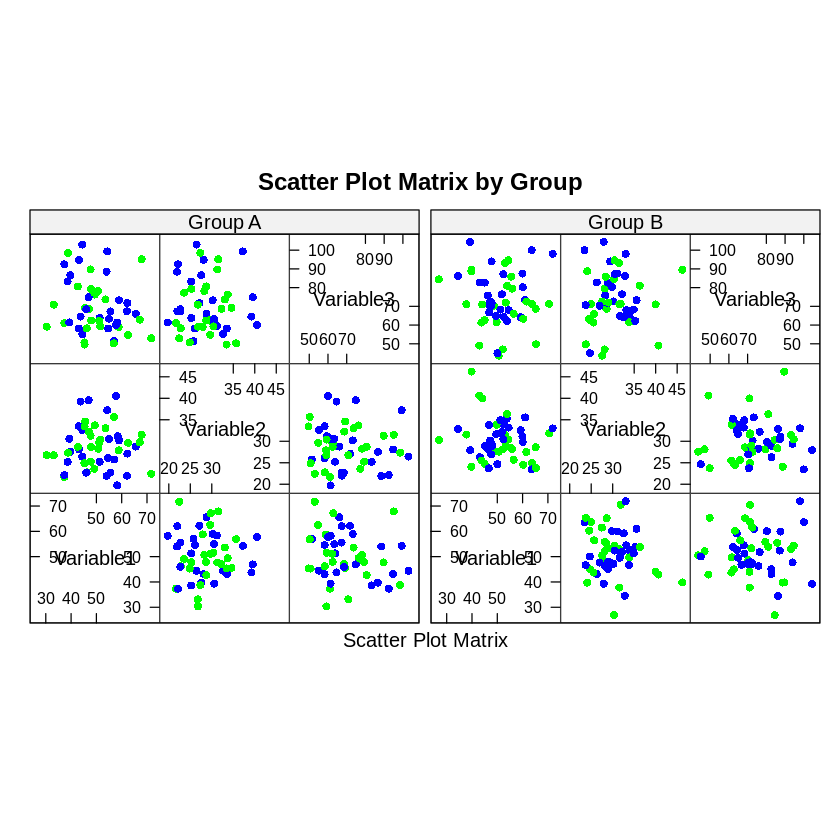

In [28]:
# Scatter plot matrix conditioned on the "Group" variable
splom(~data[1:3] | Group, data = data,
      main = "Scatter Plot Matrix by Group",
      col = c("blue", "green"),
      pch = 16)


#### Explanation of the Plot
- **Scatter Plot Matrix (splom)**: This function creates a matrix of scatter plots for the specified variables. The plots are conditioned on the `Group` variable, meaning separate panels are created for each level of `Group` (Group A and Group B).
- **Marks**:
  - **Points**: Points are used as the primary mark to represent individual observations in the dataset. The scatter plots show how pairs of variables are related to each other.
- **Channels**:
  - **Position**: The X and Y positions of each point encode the values of the two variables being compared in each scatter plot. This positioning allows us to observe the relationship between variables.
  - **Color**: Different colors are used to differentiate between the groups. In this case, blue and green represent Group A and Group B, respectively.
  - **Faceting**: The panels are divided by the `Group` variable, allowing for easy comparison between the two groups across all variable pairs.

### Rationale for Marks and Channels
- **Position**: Using position on the X and Y axes to show relationships between variables is effective for revealing trends, correlations, or clusters within the data.
- **Color**: Color is used to differentiate between the groups, helping to identify patterns or differences between Group A and Group B.
- **Faceting (Panels)**: By conditioning the scatter plots on the `Group` variable, the Lattice plot makes it easy to compare the distributions and relationships within each group. This faceted approach is particularly useful when analyzing how a categorical variable influences the relationships between continuous variables.

### Storytelling Advantage
The scatter plot matrix created with `Lattice` is ideal for multivariate data analysis. It allows for a comprehensive examination of pairwise relationships while simultaneously conditioning on a categorical variable. This visualization makes it easy to detect patterns, correlations, and differences across groups, which is valuable for exploratory data analysis and hypothesis testing.

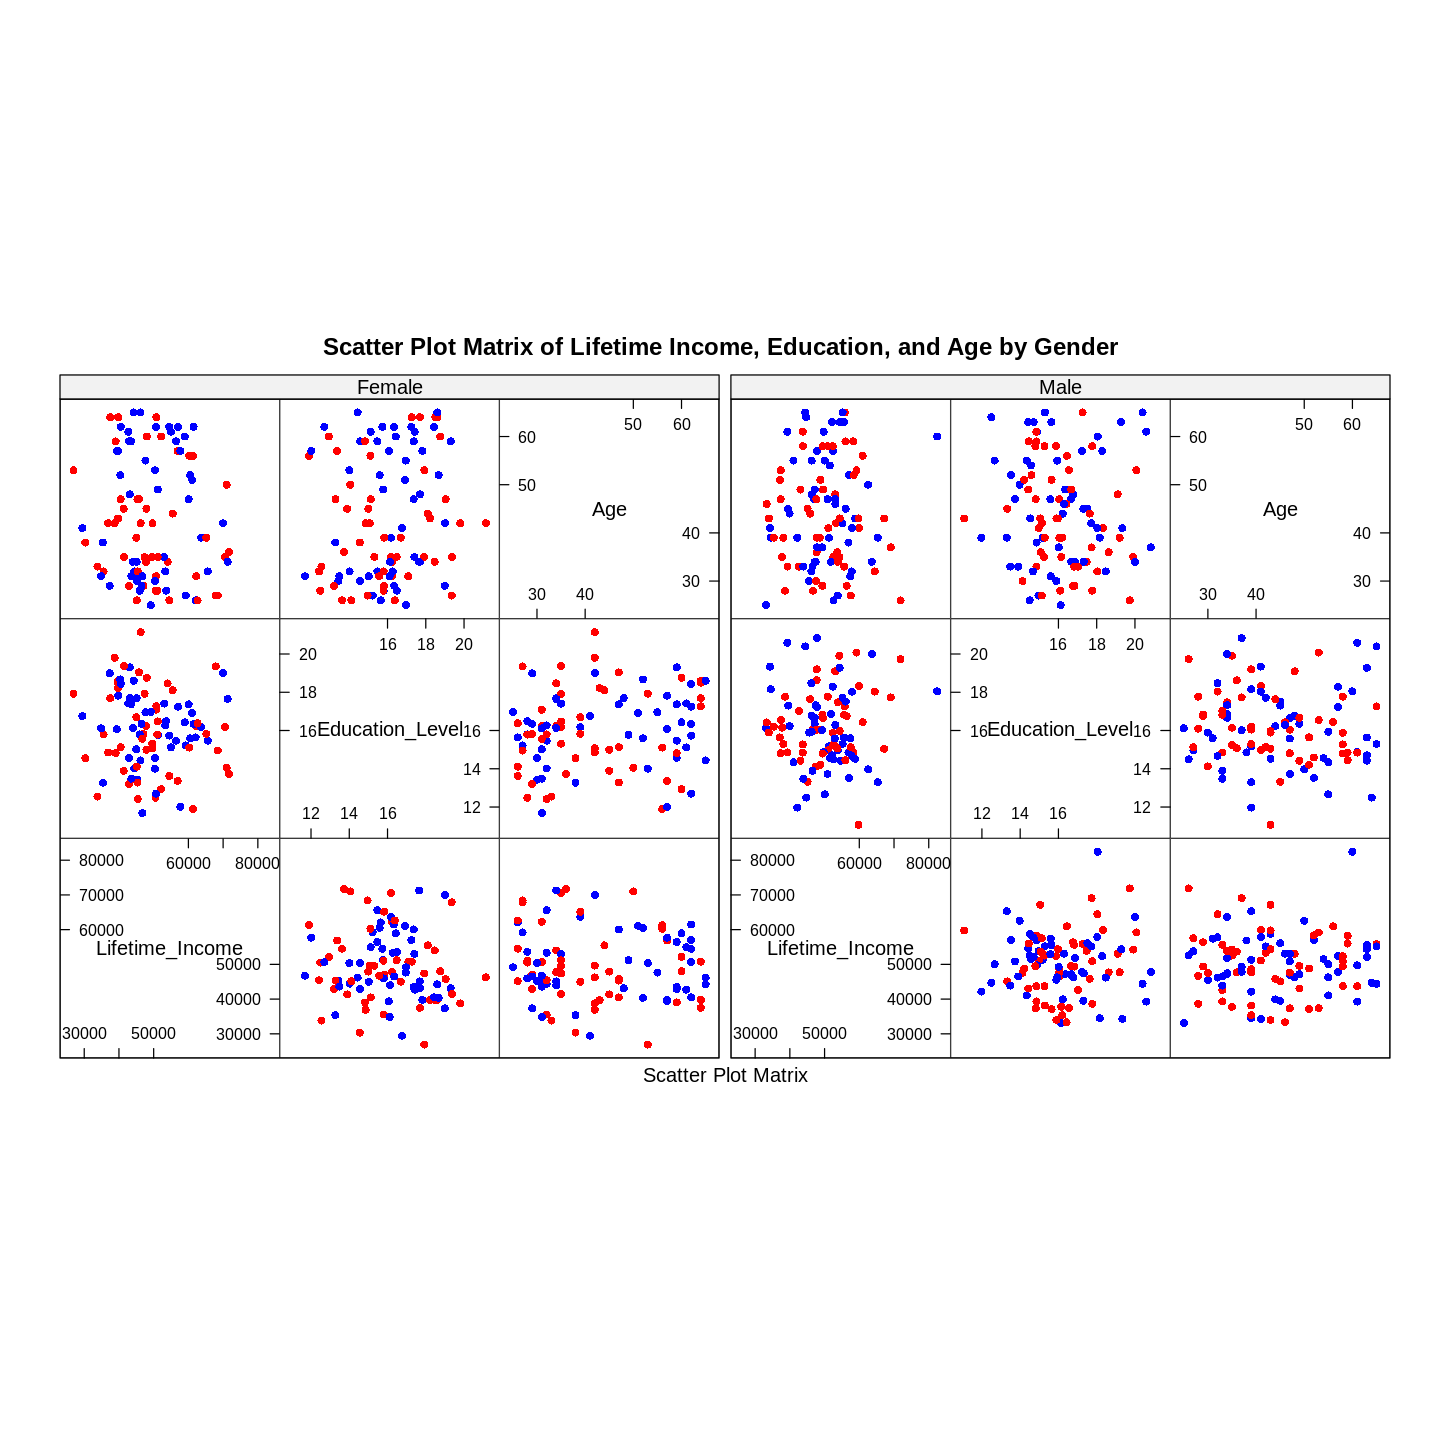

In [54]:
# Load the lattice package
library(lattice)

# Simulating data for visualization
set.seed(123)  # For reproducibility
data <- data.frame(
  Lifetime_Income = rnorm(200, mean = 50000, sd = 10000),  # Simulated lifetime income
  Education_Level = rnorm(200, mean = 16, sd = 2),  # Simulated years of education
  Age = sample(25:65, 200, replace = TRUE),  # Simulated age between 25 and 65
  Gender = factor(sample(c("Male", "Female"), 200, replace = TRUE))  # Male or Female
)

# Increase the size of the graphics device
options(repr.plot.width = 12, repr.plot.height = 12)  # Adjust the plot size (for R Markdown or Jupyter)

# Create a larger scatter plot matrix
splom(
  ~data[c("Lifetime_Income", "Education_Level", "Age")] | data$Gender,
  data = data,
  main = "Scatter Plot Matrix of Lifetime Income, Education, and Age by Gender",
  pch = 16, col = c("blue", "red"),
  auto.key = list(columns = 2, title = "Gender", space = "right"),
  par.settings = list(
    layout.widths = list(left.padding = 4, right.padding = 4),
    layout.heights = list(top.padding = 4, bottom.padding = 4)
  )
)


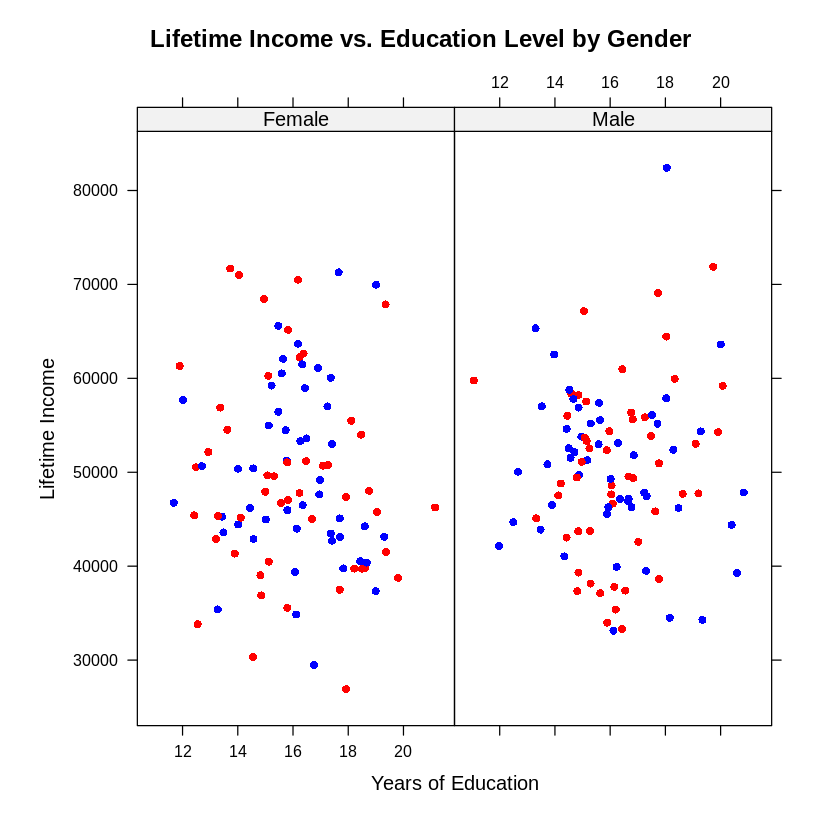

In [53]:
# Conditional scatter plot of Lifetime Income vs. Education Level by Gender
print(
  xyplot(
    Lifetime_Income ~ Education_Level | Gender,
    data = data,
    main = "Lifetime Income vs. Education Level by Gender",
    xlab = "Years of Education",
    ylab = "Lifetime Income",
    pch = 16, col = c("blue", "red"),
    auto.key = list(columns = 2, title = "Gender", space = "right"),
    par.settings = list(
      layout.widths = list(left.padding = 3, right.padding = 3),
      layout.heights = list(top.padding = 3, bottom.padding = 3)
    )
  ),
  split = c(1, 1, 1, 1), more = FALSE, position = c(0, 0, 1, 1)
)




#### Explanation of the Scatter Plot Matrix
- **splom() Function**: The `splom()` function in `lattice` creates a scatter plot matrix for multiple variables. The `|` symbol is used to condition the plots on `Gender`, so separate panels are created for males and females.
- **Marks**: Points represent individual observations in the dataset. The use of separate panels for each gender makes it easy to compare relationships between variables for males and females.
- **Channels**:
  - **Position**: The position of each point encodes the values of two variables in each scatter plot.
  - **Color**: Different colors are used to represent different genders, making it easy to distinguish between male and female observations.


#### Explanation of the Conditional Scatter Plot
- **xyplot() Function**: The `xyplot()` function in `lattice` creates scatter plots of `Lifetime_Income` against `Education_Level`, with separate panels for males and females.
- **Marks**: Points are used to represent observations, and the relationship between `Lifetime_Income` and `Education_Level` can be examined separately for each gender.
- **Channels**:
  - **Position**: The X and Y positions encode `Education_Level` and `Lifetime_Income`, respectively, making it easy to see trends or patterns.
  - **Color**: The use of color helps distinguish between observations in different gender panels.

---

#### Storytelling Advantage
- **Comparative Analysis**: By conditioning on gender, these visualizations allow us to compare how variables like education and age relate to lifetime income differently for males and females.
- **Exploring Relationships**: Scatter plot matrices and conditional scatter plots provide a comprehensive view of the relationships between multiple variables, making it easier to identify trends, outliers, or differences between groups.
- **Engaging Visuals**: The use of panels and color coding makes the visualizations clear and engaging, helping to convey complex information effectively.

These visualizations are particularly useful in exploratory data analysis, allowing us to generate hypotheses about how lifetime income, education, and age may differ between males and females.